In [2]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# Image로 저장하기
from PIL import Image

# ML Data 나누기
from sklearn.model_selection import train_test_split
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn import svm
from sklearn.svm import SVC
# Neural Net
from sklearn.neural_network import MLPClassifier
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessClassifier
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 회귀모델
from sklearn.neighbors import KNeighborsRegressor
# 선형회귀
from sklearn.linear_model import LinearRegression
# 표준화
from sklearn.preprocessing import StandardScaler
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
# KFold
from sklearn.model_selection import StratifiedKFold
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 히스토그램기반 gradient boosting
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
# xgboost classifier
from xgboost import XGBClassifier

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

# 확률적 경사하강법의 분류 알고리즘 적용
from sklearn.linear_model import SGDClassifier

# 교차 검증
from sklearn.model_selection import cross_validate


# Cluster
from sklearn.cluster import KMeans
# Voting
from sklearn.ensemble import VotingClassifier
# 정확도 측정
from sklearn.metrics import accuracy_score

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 비지도 학습
- Target이 없는 데이터 분류하기
- regression 사용 불가 > classification에 사용
- 군집화와 차원 축소 있음

---
### 군집 알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 분류하기

npy 확장자: 데이터 포맷 가능한 확장자, 특히 이미지 저장할 때 많이 사용

In [3]:
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

height: 300     
horizontal:100      
vertical:100        

> 흑백 이미지       
> 300개의 이미지가 100*100 픽셀로 구성되어 있음     
> 100개는 사과, 100개는 파인애플, 100개는 바나나        

In [4]:
fruits[0,0,:]   # color 값

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

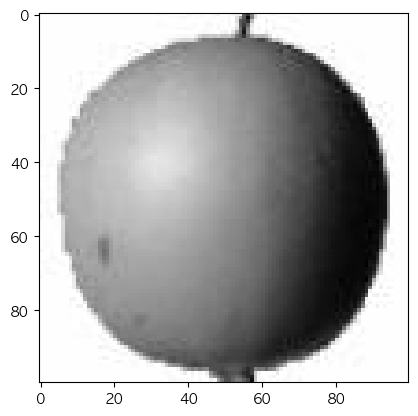

In [5]:
# 사과 이미지 보기
# 그림도 차트다
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

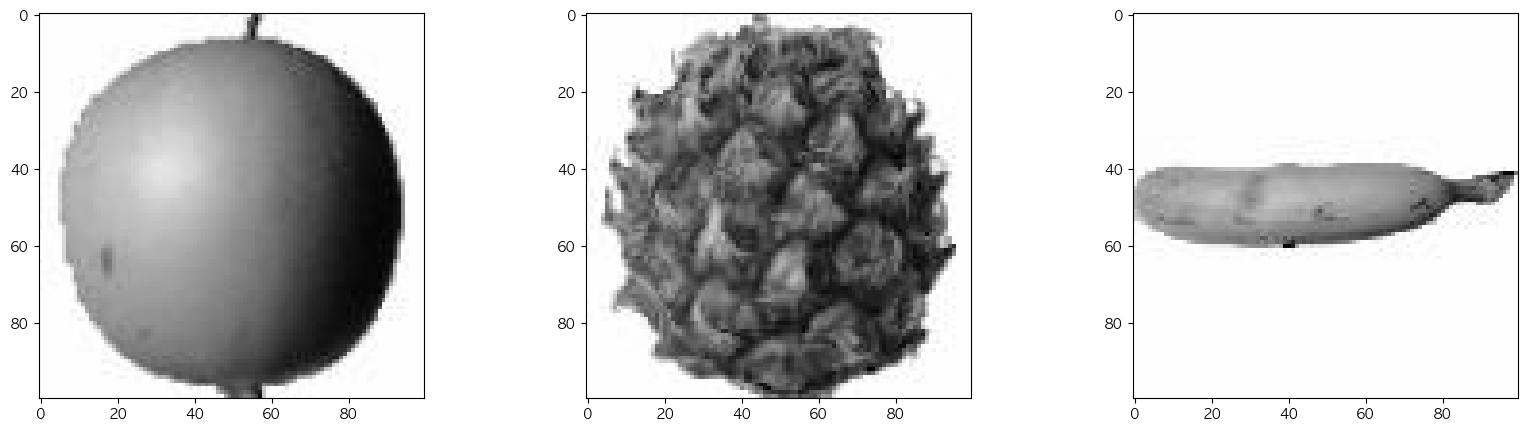

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경하기
- 배열중 page단의 수는 apple, pineapple, banana로 변경

In [7]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [8]:
apple.shape

(100, 10000)

# 픽셀 값 분석하기

In [9]:
apple

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [10]:
# apple의 Sample별(행별) 평균구하기
print(apple.mean(axis=1))
print(np.mean(apple.mean(axis=1)))

[ 88.4588  98.0594  87.4831  98.4898  92.9991  82.7579  94.536   95.7095
  90.7508  81.7788  87.1803  95.2125  93.9517  87.1466  97.6411  87.3593
  89.0571 101.0366  92.8971 101.0462 105.0824  88.7961  99.6585  97.359
  94.2293  92.2932  95.2592  93.4393 103.0312  94.7767  90.6388  89.1673
  97.8923  97.4053 100.8732  90.6799 100.3753  85.9834  96.5866  97.2989
  90.8155 102.4502  87.3238  89.9929  86.8717  86.4904  95.3862  89.289
  96.9175  91.782   96.2412  99.7925  95.1062  87.5648  89.3416  89.6668
  93.9096  97.5639  87.2779  97.9526 103.3378  94.5728  83.8009  83.6077
 102.9481  87.1496  91.3842 100.5921  93.9603  90.9806  97.5707  97.574
  82.5605  87.2897  97.0628  90.4258  90.6506  97.741   98.1869  93.7264
  87.536   84.8565  89.2303  86.8919  88.8434  86.7783  96.8703  97.3682
  82.0917  87.3228  97.3397  83.5962  96.1054  91.9384  98.54   100.9437
 101.6772 100.8073  91.7265  89.0316]
93.10731800000002


In [11]:
banana.mean(axis=1)

array([19.6562, 24.5662, 36.8766, 18.6601, 53.6558, 31.7044, 51.9657,
       28.5927, 23.9271, 32.2568, 29.258 , 24.7185, 27.8753, 41.4379,
       61.1718, 32.8263, 38.5741, 30.5538, 30.2259, 21.5571, 32.7725,
       39.7495, 47.9444, 57.8857, 33.782 , 23.6046, 49.8249, 44.1985,
       46.2651, 33.6805, 36.1886, 69.1677, 34.0441, 33.005 , 60.3284,
       33.1187, 45.4309, 56.2518, 37.0371, 25.7959, 32.8392, 29.1431,
       57.8126, 44.749 , 31.2881, 29.965 , 41.045 , 23.8932, 43.2136,
       32.5144, 26.1811, 55.6772, 22.3343, 29.6437, 24.1837, 22.714 ,
       24.3289, 46.3985, 32.1923, 42.6475, 44.6537, 24.1214, 27.778 ,
       32.4904, 19.3099, 22.5723, 19.769 , 26.297 , 25.8821, 25.3296,
       26.53  , 35.018 , 28.6522, 80.9907, 37.0376, 47.5271, 18.886 ,
       33.1672, 37.9424, 34.9369, 33.6976, 24.5432, 32.8786, 19.8387,
       32.6769, 28.6619, 23.2095, 26.4962, 27.3008, 38.8501, 18.8745,
       30.3564, 54.4535, 38.0472, 32.3986, 31.2098, 33.322 , 37.6796,
       38.2613, 26.4

In [12]:
np.mean(apple.mean(axis=1))

93.10731800000002

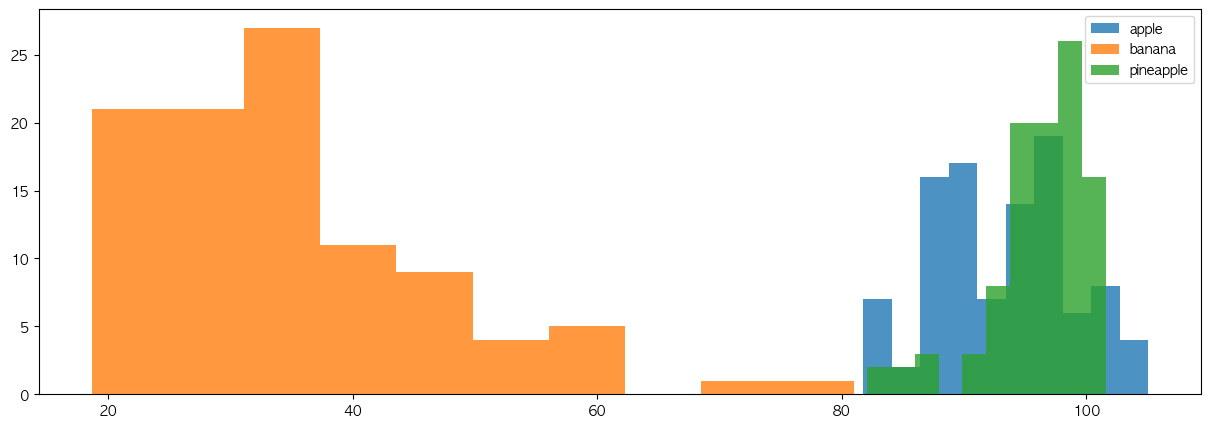

In [13]:
# 과일별 빈도수 히스토그램으로 표현하기
plt.figure(figsize=(15,5))
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

x축은 과일 평균값
y축은 개수

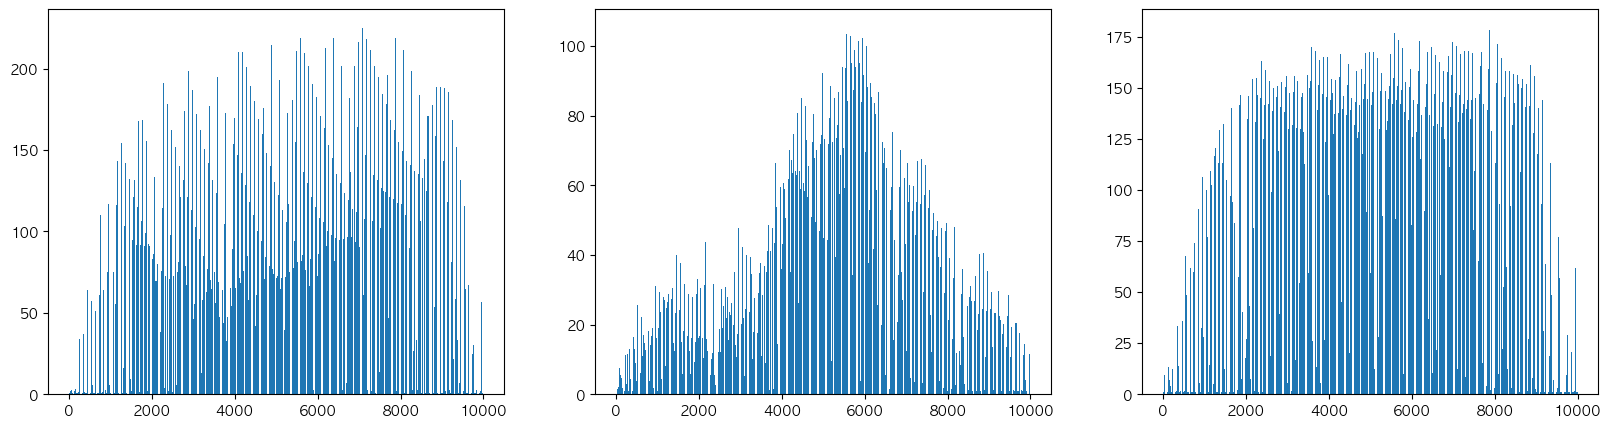

In [16]:
# Feature별 평균 막대 그래프
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(banana, axis=0))
axs[2].bar(range(10000), np.mean(pineapple, axis=0))

plt.show()

- 사과는 꼭지 때문에 하단부분이 고르게 나온다.

### 평균 이미지 그림 표현하기 : 2차원 배열로 변경

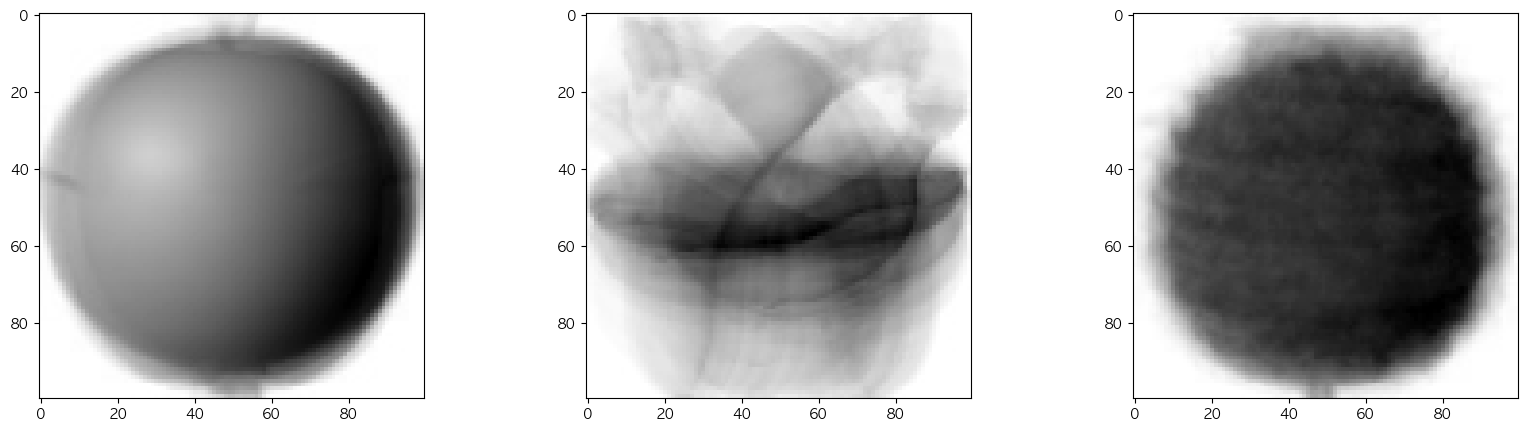

In [17]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(banana_mean, cmap='gray_r')
axs[2].imshow(pineapple_mean, cmap='gray_r')

plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다.
- 사과만 잘 분류하자는 시도

In [46]:
abs_diff = np.abs(fruits - apple_mean)  # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2))    # axis 3차원 중 1, 2만 한다, abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만 구한다.
abs_mean.shape      # 300개의 원소로 이루어진 1차원 비열

(300,)

In [47]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하므로 arg.sort를 사용한다.
apple_index = np.argsort(abs_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 30,
       68, 66, 24, 76, 15, 98, 84, 47, 90,  3, 94, 23, 32, 53, 71, 14,  7,
       73, 36, 77, 55, 21, 10, 39, 17, 99, 11, 35, 65, 95,  6, 61, 56, 22,
       89,  2, 13, 80,  0, 97,  4, 58, 40, 75, 43, 34, 82, 16, 54, 31, 49,
       93, 37, 63, 64, 41, 28, 25, 96, 67,  8, 83, 46, 19, 79, 72,  5, 85,
       20, 29, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

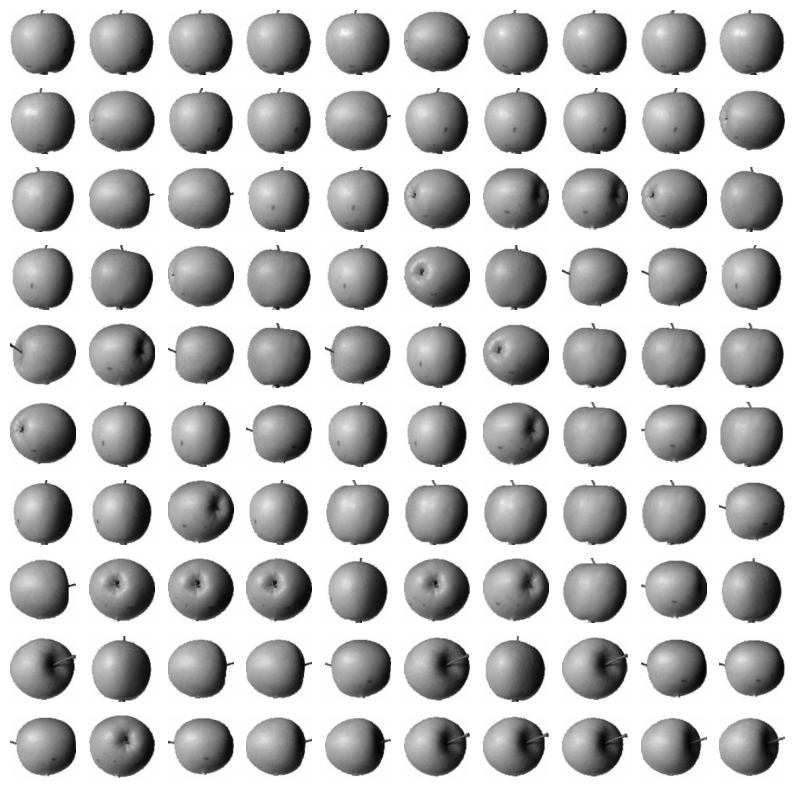

In [48]:
# 그림 그려보기
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
        
plt.show()

### 바나나로 확인해보기

In [49]:
abs_diff = np.abs(fruits - banana_mean)  # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2))    # axis 3차원 중 1, 2만 한다, abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만 구한다.
abs_mean.shape      # 300개의 원소로 이루어진 1차원 비열



(300,)

In [50]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하므로 arg.sort를 사용한다.
banana_index = np.argsort(abs_mean)[:100]
banana_index


array([285, 212, 291, 261, 208, 286, 284, 265, 219, 276, 264, 290, 283,
       252, 255, 203, 266, 200, 201, 269, 247, 256, 281, 270, 211, 254,
       268, 239, 299, 225, 250, 275, 280, 232, 246, 205, 244, 263, 297,
       224, 279, 262, 238, 288, 289, 287, 218, 245, 217, 230, 274, 295,
       209, 220, 213, 267, 237, 229, 248, 278, 204, 243, 228, 206, 207,
       272, 241, 210, 214, 233, 222, 235, 277, 253, 294, 282, 240, 271,
       296, 249, 215, 258, 259, 227, 202, 236, 293, 260, 226, 216, 292,
       257, 221, 298, 251, 223, 242, 231,   9,  88])

In [51]:
abs_diff = np.abs(fruits - pineapple_mean)  # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2))    # axis 3차원 중 1, 2만 한다, abs_diff가 3차원이기 때문에 page차원을 제외하고 행과 열만 구한다.
abs_mean.shape      # 300개의 원소로 이루어진 1차원 비열

(300,)

In [52]:

pineapple_index = np.argsort(abs_mean)[:100]
pineapple_index

array([111, 164, 152, 136, 137, 129, 166, 165, 101, 174, 182, 150, 192,
       148, 117, 140, 100, 193, 184, 181, 162, 175, 191, 120, 154, 155,
       157, 145, 186, 121, 103, 161, 122, 138, 118, 176, 160, 127, 156,
       144, 158, 105, 104, 188, 102, 124, 198, 177, 112, 185, 133, 125,
       131, 180, 109, 115, 110, 149, 106, 187, 163, 170, 141, 159, 183,
       142, 128, 195, 147, 167, 119, 189, 190, 151, 135, 169, 123, 171,
       143, 168, 107, 108, 113, 197, 130, 139, 116, 134, 199, 172, 179,
        77, 146, 178, 114, 194, 196, 173,  32,  46])

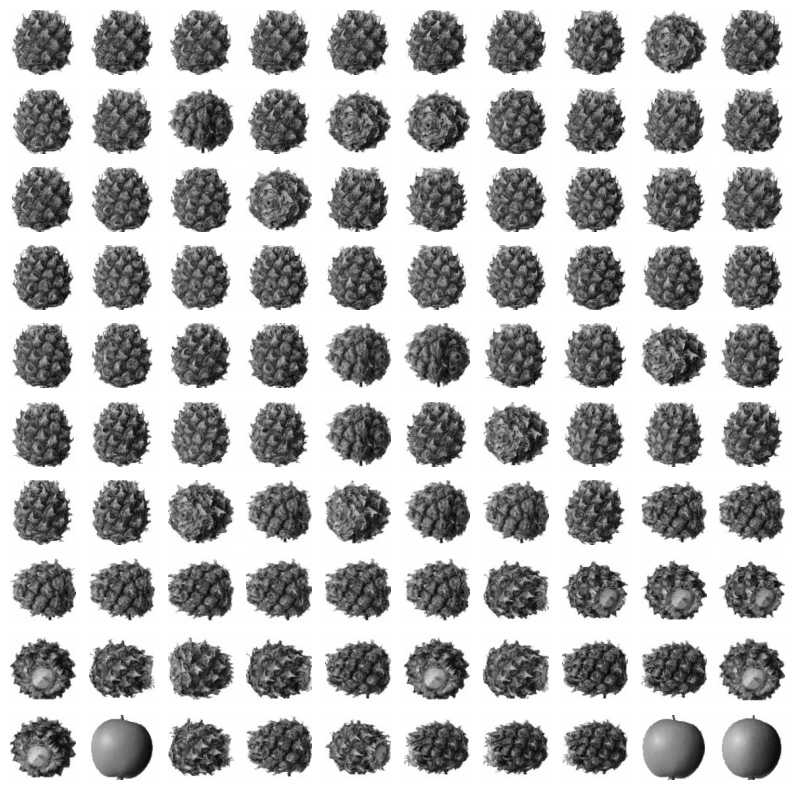

In [59]:
# 그림 그려보기
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
        axs[i,j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
        
plt.show()